# アフィン変換・射影変換の処理時間調査

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# OpenCVの画像を画面表示する関数
def show_img_cv2(img_cv2):
    img_RGB = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)

heit: 3456  width: 5184


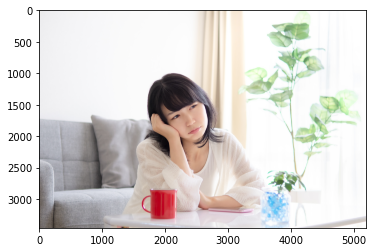

In [3]:
img = cv2.imread('img/24195756_l.jpg')
h, w = img.shape[:2]
print(f'heit: {h}  width: {w}')
show_img_cv2(img)

### アフィン変換：cv2.warpAffine()を使って画像を回転

アフィン行列：
[[ 9.84807753e-01  1.73648178e-01 -3.32104108e+02]
 [-1.73648178e-01  9.84807753e-01  2.04032672e+02]]


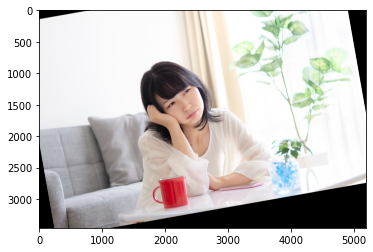

In [4]:
mat1 = cv2.getRotationMatrix2D((1000, 2000), 10, 1)
print('アフィン行列：')
print(mat1)
rotated_img1 = cv2.warpAffine(img, mat1, (w, h))
show_img_cv2(rotated_img1)

### 射影変換：cv2.warpPerspective()を使って画像を回転

射影変換行列：
[[ 9.84807753e-01  1.73648178e-01 -3.32104108e+02]
 [-1.73648178e-01  9.84807753e-01  2.04032672e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


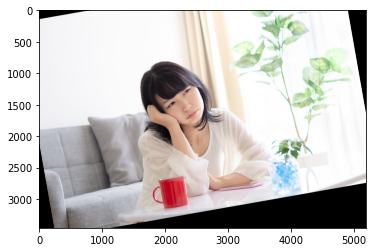

In [5]:
mat2 = np.concatenate([mat1, np.array([[0, 0, 1]])], 0)
print('射影変換行列：')
print(mat2)
rotated_img2 = cv2.warpPerspective(img, mat2, (w, h))
show_img_cv2(rotated_img2)

### 処理時間の比較
timeitモジュールを使って、100回ずつ処理を繰り返した際の平均処理時間を求める

In [6]:
import timeit
loop = 100
result1 = timeit.timeit(lambda: cv2.warpAffine(img, mat1, (w, h)), number=loop)
print(f'warpAffine : {result1 / loop}')

result2 = timeit.timeit(lambda: cv2.warpPerspective(img, mat2, (w, h)), number=loop)
print(f'warpPerspective : {result2 / loop}')


warpAffine : 0.039798078000312674
warpPerspective : 0.0526076000003377


## 結論：warpPerspective()はwarpAffine()に比べると少し遅い